# Predicting ship collisions in the arctic sea

In [88]:
#Import Libraries
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb
import pyAgrum.lib.image as gumimage
import itertools

**Regarding the function below**<br>
The getIterations function takes in an array of items that would be the inputs to the "or" gate in the Fault Tree, The variable that would be the output to the fault tree and then the decision network itself

In [95]:
#Helper methods
def count(items):
    num = 0
    for i in items:
        if i == 1:
            num = num+1
    if num<len(items)/2: #Check if should be < or <=
        return True
    else:
        return False

def getIterations(vars, mainVariable, dn):
    lst = list(itertools.product([0, 1], repeat=len(vars)))
    items = {}
    counter = 0
    for i in lst:
        for j in range(len(vars)):
            items[vars[j]] = i[j]
        print("Method insert for", mainVariable, "dictionary is", items, "with probabilities 0.42")
        dn.cpt(mainVariable)[items] = [1-0.4247, 0.4247]
        counter = counter+1
        #print(items)
        #if count(i):
        #    print("Method insert for", mainVariable, "dictionary is", items, "with probabilities 0.42")
            #dn.cpt(mainVariable)[items] = [1, 0]
        #else:
        #    print("Method insert for",mainVariable, "dictionary is", items, "with probabilities 0.42")
        #    #dn.cpt(mainVariable)[items] = [0, 1]
    print(counter)

# Construction

## Define Nodes

In [90]:
#Define Nodes
dn = gum.InfluenceDiagram()
#Regular Nodes
var_names = ["Waves", "HighWind", "Fog", "PackIce", "RidgeIceAndIceberg", "Collision", "Environment", "HighSpeed", "EquipmentError", "RadarFailure", "HumanError", "ShipFault"]
waves, highwind, fog, packice, ridgeiceandiceberg, collision, environment, highspeed, equipmenterror, radarfailure, humanerror, shipfault = [dn.add(gum.LabelizedVariable(name, name, 2)) for name in var_names]
#The above are binary variables, area isn't so do that manually:
area = dn.add(gum.LabelizedVariable("Area", "Area", ["region1", "region2", "region3", "region4", "region5"]))
#Decision Node
continueexpedition = dn.addDecisionNode(gum.LabelizedVariable("ContinueExpedition", "ContinueExpedition", 2))
#Utility Node
u = dn.addUtilityNode(gum.LabelizedVariable("U", "U", 1))
dn

(pyAgrum.InfluenceDiagram<double>@000001FE44220490) Influence Diagram{
  chance: 13,
  utility: 1,
  decision: 1,
  arcs: 0,
  domainSize: 40960
}

## Arcs

Add in Arcs

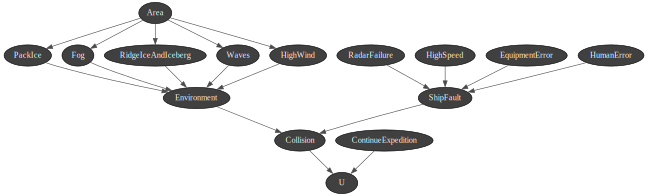

In [91]:
dn.addArc(area, waves)
dn.addArc(area, highwind)
dn.addArc(area, fog)
dn.addArc(area, packice)
dn.addArc(area, ridgeiceandiceberg)
dn.addArc(waves, environment)
dn.addArc(highwind, environment)
dn.addArc(fog, environment)
dn.addArc(packice, environment)
dn.addArc(ridgeiceandiceberg, environment)
dn.addArc(highspeed, shipfault)
dn.addArc(radarfailure, shipfault)
dn.addArc(equipmenterror, shipfault)
dn.addArc(humanerror, shipfault)
dn.addArc(shipfault, collision)
dn.addArc(environment, collision)
dn.addArc(collision, u)
dn.addArc(continueexpedition, u)
gnb.showBN(dn,size="9")


## CPTs


Add in CPT


For "Navigation" Effect I used the idea from this paper (https://reader.elsevier.com/reader/sd/pii/S0951832000000776?token=26EF05B58BEE12E1BFA7AF8C03ADFFF4715762438DDD0922D73E499AD84F80A194F925EA79A8B74025BECAE7F242470D&originRegion=eu-west-1&originCreation=20230504070556) as all gates represent causal relationships - therefore either true or false

In [92]:
#For Area
dn.cpt("Area").fillWith([1/5, 1/5, 1/5, 1/5, 1/5])
dn.cpt("Area")

(pyAgrum.Potential<double>@000001FE440DA230) 
  Area                                           |
region1  |region2  |region3  |region4  |region5  |
---------|---------|---------|---------|---------|
 0.2000  | 0.2000  | 0.2000  | 0.2000  | 0.2000  |

CPTs for oberserved nodes

In [93]:
#PackIce (X11)
dn.cpt("PackIce")[{"Area":"region1"}] = [1-0.0053, 0.0053]
dn.cpt("PackIce")[{"Area":"region2"}] = [1-0.01, 0.01]
dn.cpt("PackIce")[{"Area":"region3"}] = [1-0.0037, 0.0037]
dn.cpt("PackIce")[{"Area":"region4"}] = [1-0.001, 0.001]
dn.cpt("PackIce")[{"Area":"region5"}] = [1-0.0001, 0.0001]

#Fog (X7)
dn.cpt("Fog")[{"Area":"region1"}] = [1-0.05, 0.05]
dn.cpt("Fog")[{"Area":"region2"}] = [1-0.01, 0.01]
dn.cpt("Fog")[{"Area":"region3"}] = [1-0.05, 0.05]
dn.cpt("Fog")[{"Area":"region4"}] = [1-0.01, 0.01]
dn.cpt("Fog")[{"Area":"region5"}] = [1-0.0005, 0.0005]

#RidgeIceAndIceberg (X14)
dn.cpt("RidgeIceAndIceberg")[{"Area":"region1"}] = [1-0.01, 0.01]
dn.cpt("RidgeIceAndIceberg")[{"Area":"region2"}] = [1-0.01, 0.01]
dn.cpt("RidgeIceAndIceberg")[{"Area":"region3"}] = [1-0.05, 0.05]
dn.cpt("RidgeIceAndIceberg")[{"Area":"region4"}] = [1-0.01, 0.01]
dn.cpt("RidgeIceAndIceberg")[{"Area":"region5"}] = [1-0.005, 0.005]

#Waves (X9)
dn.cpt("Waves")[{"Area":"region1"}] = [1-0.0023, 0.0023]
dn.cpt("Waves")[{"Area":"region2"}] = [1-0.0053, 0.0053]
dn.cpt("Waves")[{"Area":"region3"}] = [1-0.001, 0.001]
dn.cpt("Waves")[{"Area":"region4"}] = [1-0.00083, 0.00083]
dn.cpt("Waves")[{"Area":"region5"}] = [1-0.0001, 0.0001]

#HighWind (X8)
dn.cpt("HighWind")[{"Area":"region1"}] = [1-0.0017, 0.0017]
dn.cpt("HighWind")[{"Area":"region2"}] = [1-0.0053, 0.0053]
dn.cpt("HighWind")[{"Area":"region3"}] = [1-0.0017, 0.0017]
dn.cpt("HighWind")[{"Area":"region4"}] = [1-0.0005, 0.0005]
dn.cpt("HighWind")[{"Area":"region5"}] = [1-0.0001, 0.0001]

#HighSpeed (X2)
dn.cpt("HighSpeed").fillWith([1-0.0068, 0.0068])
#EquipmentError (X3)
dn.cpt("EquipmentError").fillWith([1-0.008563, 0.008563])
#RadarFailure (X4)
dn.cpt("RadarFailure").fillWith([1-0.0234, 0.0234])
#HumanError (X5)
dn.cpt("HumanError").fillWith([1-0.0074, 0.0074])


(pyAgrum.Potential<double>@000001FE44246840) 
  HumanError       |
0        |1        |
---------|---------|
 0.9926  | 0.0074  |

In [96]:
vars = ["Waves", "HighWind", "Fog", "PackIce", "RidgeIceAndIceberg"]
getIterations(vars, "Environment", dn)
dn.cpt("Environment")
#dn.cpt("Environment").fillWith([1-0.4247, 0.4247])

Method insert for Environment dictionary is {'Waves': 0, 'HighWind': 0, 'Fog': 0, 'PackIce': 0, 'RidgeIceAndIceberg': 0} with probabilities 0.42
Method insert for Environment dictionary is {'Waves': 0, 'HighWind': 0, 'Fog': 0, 'PackIce': 0, 'RidgeIceAndIceberg': 1} with probabilities 0.42
Method insert for Environment dictionary is {'Waves': 0, 'HighWind': 0, 'Fog': 0, 'PackIce': 1, 'RidgeIceAndIceberg': 0} with probabilities 0.42
Method insert for Environment dictionary is {'Waves': 0, 'HighWind': 0, 'Fog': 0, 'PackIce': 1, 'RidgeIceAndIceberg': 1} with probabilities 0.42
Method insert for Environment dictionary is {'Waves': 0, 'HighWind': 0, 'Fog': 1, 'PackIce': 0, 'RidgeIceAndIceberg': 0} with probabilities 0.42
Method insert for Environment dictionary is {'Waves': 0, 'HighWind': 0, 'Fog': 1, 'PackIce': 0, 'RidgeIceAndIceberg': 1} with probabilities 0.42
Method insert for Environment dictionary is {'Waves': 0, 'HighWind': 0, 'Fog': 1, 'PackIce': 1, 'RidgeIceAndIceberg': 0} with prob

(pyAgrum.Potential<double>@000001FE441587F0) 
                                  ||  Environment      |
Waves |HighWi|Fog   |PackIc|RidgeI||0        |1        |
------|------|------|------|------||---------|---------|
0     |0     |0     |0     |0     || 0.5753  | 0.4247  |
1     |0     |0     |0     |0     || 0.5753  | 0.4247  |
0     |1     |0     |0     |0     || 0.5753  | 0.4247  |
1     |1     |0     |0     |0     || 0.5753  | 0.4247  |
0     |0     |1     |0     |0     || 0.5753  | 0.4247  |
1     |0     |1     |0     |0     || 0.5753  | 0.4247  |
[...20 more line(s) ...]
0     |1     |0     |1     |1     || 0.5753  | 0.4247  |
1     |1     |0     |1     |1     || 0.5753  | 0.4247  |
0     |0     |1     |1     |1     || 0.5753  | 0.4247  |
1     |0     |1     |1     |1     || 0.5753  | 0.4247  |
0     |1     |1     |1     |1     || 0.5753  | 0.4247  |
1     |1     |1     |1     |1     || 0.5753  | 0.4247  |